# Lab 04: Clustering and Association Rule Learning

### E20280


**1 Clustering**

1.1 Importing Required Modules

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # to generate sample datasets

1.2 Creating a Sample Dataset with 4 Clusters

In [6]:
X, y = make_blobs (
    n_samples =400 ,
    centers =4 ,
    cluster_std =0.90 ,
    random_state =1
)

 1.3 Determining the Optimum Value of k Using the Elbow Method

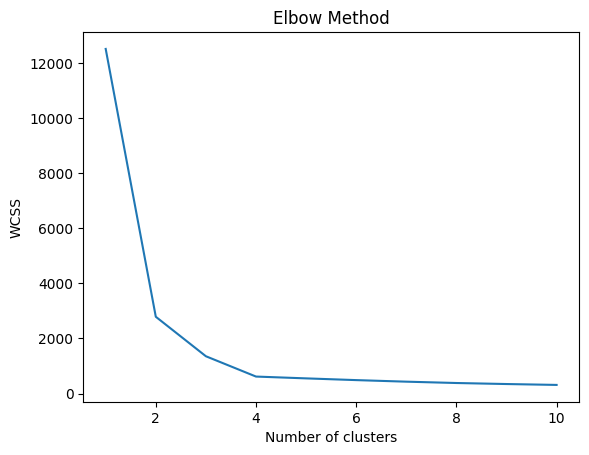

In [7]:
import matplotlib.pyplot as plt
wcss = [] # within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(
    n_clusters=i,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=0
    )

    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

 1.4 ApplyingtheK-MeansAlgorithm

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0) # from Elbow method
closest_cluster_index = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_

1.5 VisualizingClusters

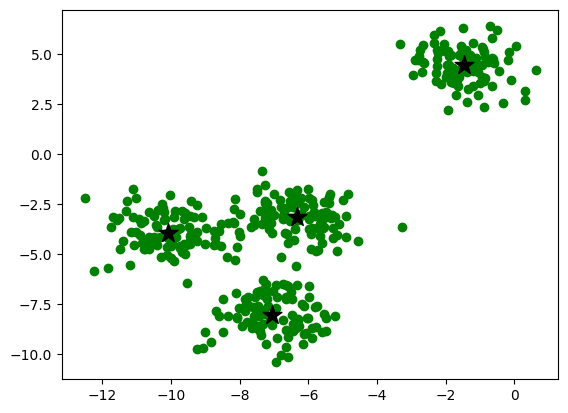

In [10]:
plt.scatter(X[:, 0], X[:, 1], c="green")
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    s=200,
    c="black",
    marker="*"
    )
plt.show()

###  Exercise01

1. Import the iris dataset from scikit-learn. Convert it into an unlabeled dataset by removing the class
attribute.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_X = iris.data  # features only, unlabeled dataset

2. Use the Elbow method to identify the best value for k (minimizing WCSS).

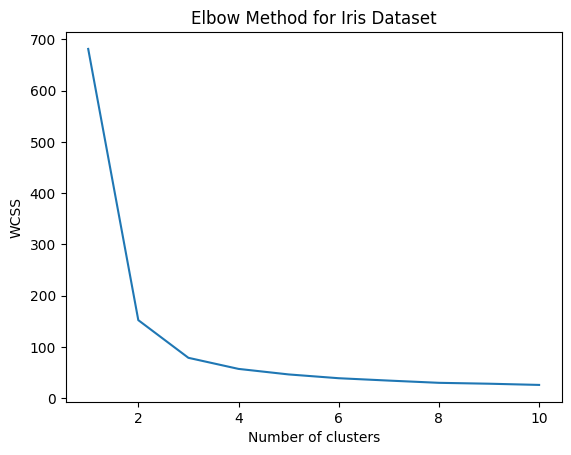

In [11]:
wcss_iris = [] # Within Cluster Sum of Squares for iris dataset
# Using the Elbow Method to find the optimal number of clusters for the Iris dataset
for k in range(1, 11):
    # kmeans with k clusters
    kmeans_iris = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=0)
    # fit the model (train the model)
    kmeans_iris.fit(iris_X)
    # append the inertia (WCSS) to the list (Inertia is the sum of squared distances of samples to their closest cluster center)
    wcss_iris.append(kmeans_iris.inertia_)

plt.plot(range(1, 11), wcss_iris)
plt.title("Elbow Method for Iris Dataset")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

3. Fit the K-Means algorithm with the k found in part (b)

In [12]:
# Fit KMeans with the optimal k (3) found from the Elbow method for the iris dataset
kmeans_iris = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
iris_clusters = kmeans_iris.fit_predict(iris_X)

4. Explain the output of:
'kmeans . cluster_centers_'

The output of `kmeans.cluster_centers_` is a NumPy array containing the coordinates of the centroids (centers) of each cluster found by the K-Means algorithm. Each row in this array represents the center of a cluster in the feature space, and each column corresponds to a feature. These centroids are the mean positions of all the points assigned to each cluster and are used to define the clusters in the data.

5. Visualize the data points and cluster centers in a 3D plot using the first three features as axes.

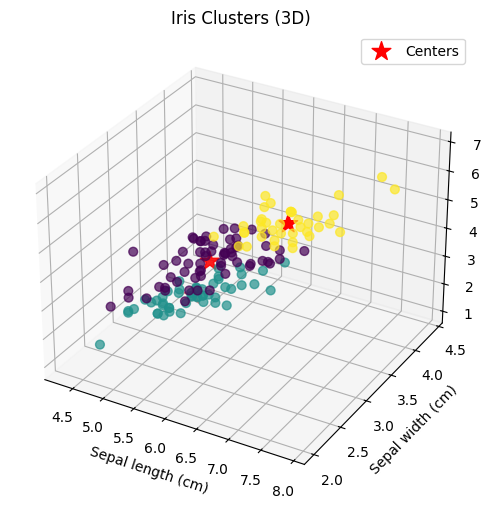

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points, colored by cluster assignment
ax.scatter(
    iris_X[:, 0], iris_X[:, 1], iris_X[:, 2],
    c=iris_clusters, cmap='viridis', s=40, alpha=0.7
)

# Plot cluster centers
centers = kmeans_iris.cluster_centers_
ax.scatter(
    centers[:, 0], centers[:, 1], centers[:, 2],
    c='red', s=200, marker='*', label='Centers'
)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
ax.set_title('Iris Clusters (3D)')
ax.legend()
plt.show()

**2 AssociationRuleLearning**

 2.1 InstallingApriori

In [ ]:
!pip install mlxtend

You should consider upgrading via the 'E:\My Projects\python\CO544 Machine Learnning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


2.2 Importing Required Modules

In [1]:
from mlxtend . frequent_patterns import apriori
from mlxtend . frequent_patterns import association_rules
from mlxtend . preprocessing import TransactionEncoder
import pandas as pd

2.3 Input Data

In [2]:
dataset = [
    ["Milk", "Onion", "Nutmeg", "Kidney Beans", "Eggs", "Yogurt"],
    ["Dill", "Onion", "Nutmeg", "Kidney Beans", "Eggs", "Yogurt"],
    ["Milk", "Apple", "Kidney Beans", "Eggs"],
    ["Milk", "Unicorn", "Corn", "Kidney Beans", "Yogurt"],
    ["Corn", "Onion", "Onion", "Kidney Beans", "Ice cream", "Eggs"]
]

2.4 Creating the DataFrame of Frequent Itemsets

In [3]:
te = TransactionEncoder()
te_ary = te.fit( dataset ).transform( dataset )
df = pd.DataFrame( te_ary , columns = te . columns_ )

2.5 Applying Apriori Algorithm and Finding Association Rules

In [4]:
freq = apriori( df , min_support =0.002 , use_colnames = True )
rules = association_rules( freq , metric ="lift" , min_threshold =1)

e:\My Projects\python\CO544 Machine Learnning\venv\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


###  Exercise02

1. Import the provided groceries.csv dataset.

In [5]:
groceries_df = pd.read_csv('groceries.csv')
groceries_df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Explore the dataset and build the frequent-item DataFrame.

In [6]:
# Explore the groceries_df dataset
print("Number of transactions:", len(groceries_df))
print("Sample transactions:")
print(groceries_df.head())

# Convert the DataFrame into a list of transactions (dropping NaNs)
transactions = groceries_df.apply(lambda row: [item for item in row if pd.notnull(item)], axis=1).tolist()

# Use TransactionEncoder to encode the transactions
te_groceries = TransactionEncoder()
te_groceries_ary = te_groceries.fit(transactions).transform(transactions)
groceries_onehot = pd.DataFrame(te_groceries_ary, columns=te_groceries.columns_)

# Build the frequent-item DataFrame using apriori
freq_groceries = apriori(groceries_onehot, min_support=0.01, use_colnames=True)
freq_groceries.head()

Number of transactions: 9834
Sample transactions:
       citrus fruit semi-finished bread       margarine  \
0    tropical fruit              yogurt          coffee   
1        whole milk                 NaN             NaN   
2         pip fruit              yogurt    cream cheese   
3  other vegetables          whole milk  condensed milk   
4        whole milk              butter          yogurt   

                ready soups        Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0                       NaN               NaN        NaN        NaN   
1                       NaN               NaN        NaN        NaN   
2              meat spreads               NaN        NaN        NaN   
3  long life bakery product               NaN        NaN        NaN   
4                      rice  abrasive cleaner        NaN        NaN   

  Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 22 Unnamed: 23 Unnamed: 24  \
0        NaN        NaN        NaN  ...         NaN         NaN         NaN   
1        N

,support,itemsets
0,0.033455,(UHT-milk)
1,0.017694,(baking powder)
2,0.052471,(beef)
3,0.033252,(berries)
4,0.026032,(beverages)


3. Apply the Apriori algorithm to find itemsets with support > 8%.

In [7]:
# Find frequent itemsets in groceries_onehot with support greater than 8%
freq_groceries_08 = apriori(groceries_onehot, min_support=0.08, use_colnames=True)
freq_groceries_08

,support,itemsets
0,0.080537,(bottled beer)
1,0.110535,(bottled water)
2,0.082672,(citrus fruit)
3,0.193512,(other vegetables)
4,0.088977,(pastry)
5,0.183954,(rolls/buns)
6,0.109010,(root vegetables)
7,0.093960,(sausage)
8,0.098536,(shopping bags)
9,0.174395,(soda)


4. Generate association rules using the lift metric.

In [8]:
# Generate association rules for the groceries dataset using the lift metric
rules_groceries = association_rules(freq_groceries, metric="lift", min_threshold=1)
rules_groceries.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,1.0,0.009574,1.292384,0.512171,0.087191,0.226236,0.238957
1,(other vegetables),(beef),0.193512,0.052471,0.019727,0.101944,1.942869,1.0,0.009574,1.055089,0.601742,0.087191,0.052213,0.238957
2,(beef),(rolls/buns),0.052471,0.183954,0.013626,0.259690,1.411714,1.0,0.003974,1.102303,0.307791,0.061159,0.092809,0.166882
3,(rolls/buns),(beef),0.183954,0.052471,0.013626,0.074074,1.411714,1.0,0.003974,1.023331,0.357383,0.061159,0.022799,0.166882
4,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,1.0,0.011669,1.332612,0.708220,0.120677,0.249594,0.245455


5. Select one rule and interpret it in your own words.

In [9]:
# Select the first rule from rules_groceries and display it
selected_rule = rules_groceries.iloc[0]
print("Selected Rule:")
print(selected_rule)

# Interpretation
print("\nInterpretation:")
print(f"If a customer buys {list(selected_rule['antecedents'])}, they are likely to also buy {list(selected_rule['consequents'])}.")
print(f"This rule has a confidence of {selected_rule['confidence']:.2f} and a lift of {selected_rule['lift']:.2f}, meaning the likelihood of buying {list(selected_rule['consequents'])} increases by a factor of {selected_rule['lift']:.2f} when {list(selected_rule['antecedents'])} is purchased.")

Selected Rule:
antecedents                       (beef)
consequents           (other vegetables)
antecedent support              0.052471
consequent support              0.193512
support                         0.019727
confidence                      0.375969
lift                            1.942869
representativity                     1.0
leverage                        0.009574
conviction                      1.292384
zhangs_metric                   0.512171
jaccard                         0.087191
certainty                       0.226236
kulczynski                      0.238957
Name: 0, dtype: object

Interpretation:
If a customer buys ['beef'], they are likely to also buy ['other vegetables'].
This rule has a confidence of 0.38 and a lift of 1.94, meaning the likelihood of buying ['other vegetables'] increases by a factor of 1.94 when ['beef'] is purchased.


6. How many rules satisfy both lift > 4 and confidence > 0.8?

In [10]:
# Count the number of rules with lift > 4 and confidence > 0.8 in the 'rules' DataFrame
num_rules = rules[(rules['lift'] > 4) & (rules['confidence'] > 0.8)].shape[0]
# Drop rules with any NaN values before counting and displaying
filtered_rules = rules.dropna()
filtered_rules = filtered_rules[(filtered_rules['lift'] > 4) & (filtered_rules['confidence'] > 0.8)]
print("Number of rules with lift > 4 and confidence > 0.8 (excluding NaN):", filtered_rules.shape[0])
print(filtered_rules)

Number of rules with lift > 4 and confidence > 0.8 (excluding NaN): 60
                            antecedents                         consequents  \
74                         (Corn, Eggs)                         (Ice cream)   
79                          (Ice cream)                        (Corn, Eggs)   
92                        (Corn, Onion)                         (Ice cream)   
97                          (Ice cream)                       (Corn, Onion)   
111                        (Corn, Milk)                           (Unicorn)   
114                           (Unicorn)                        (Corn, Milk)   
123                      (Corn, Yogurt)                           (Unicorn)   
126                           (Unicorn)                      (Corn, Yogurt)   
323          (Corn, Eggs, Kidney Beans)                         (Ice cream)   
326                        (Corn, Eggs)           (Ice cream, Kidney Beans)   
331           (Ice cream, Kidney Beans)                     